# Introduction

My name is Branden from Data Science Hacktiv8 Batch 05 

This is my Milestone 1 phase 1, about Supervised Learning with bank deposit dataset related with direct marketing campaigns of a Portuguese banking institution from May 2008 to November 2010. We are going to predict if the client will subscribe a term deposit or not. 

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv("./bank-additional-full.csv", sep=';' )
print(df.shape)
df.head(5)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Cleaning

In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Since there are no missing value, we don't need to do imputation

# EDA

Let's check all the scatter combination

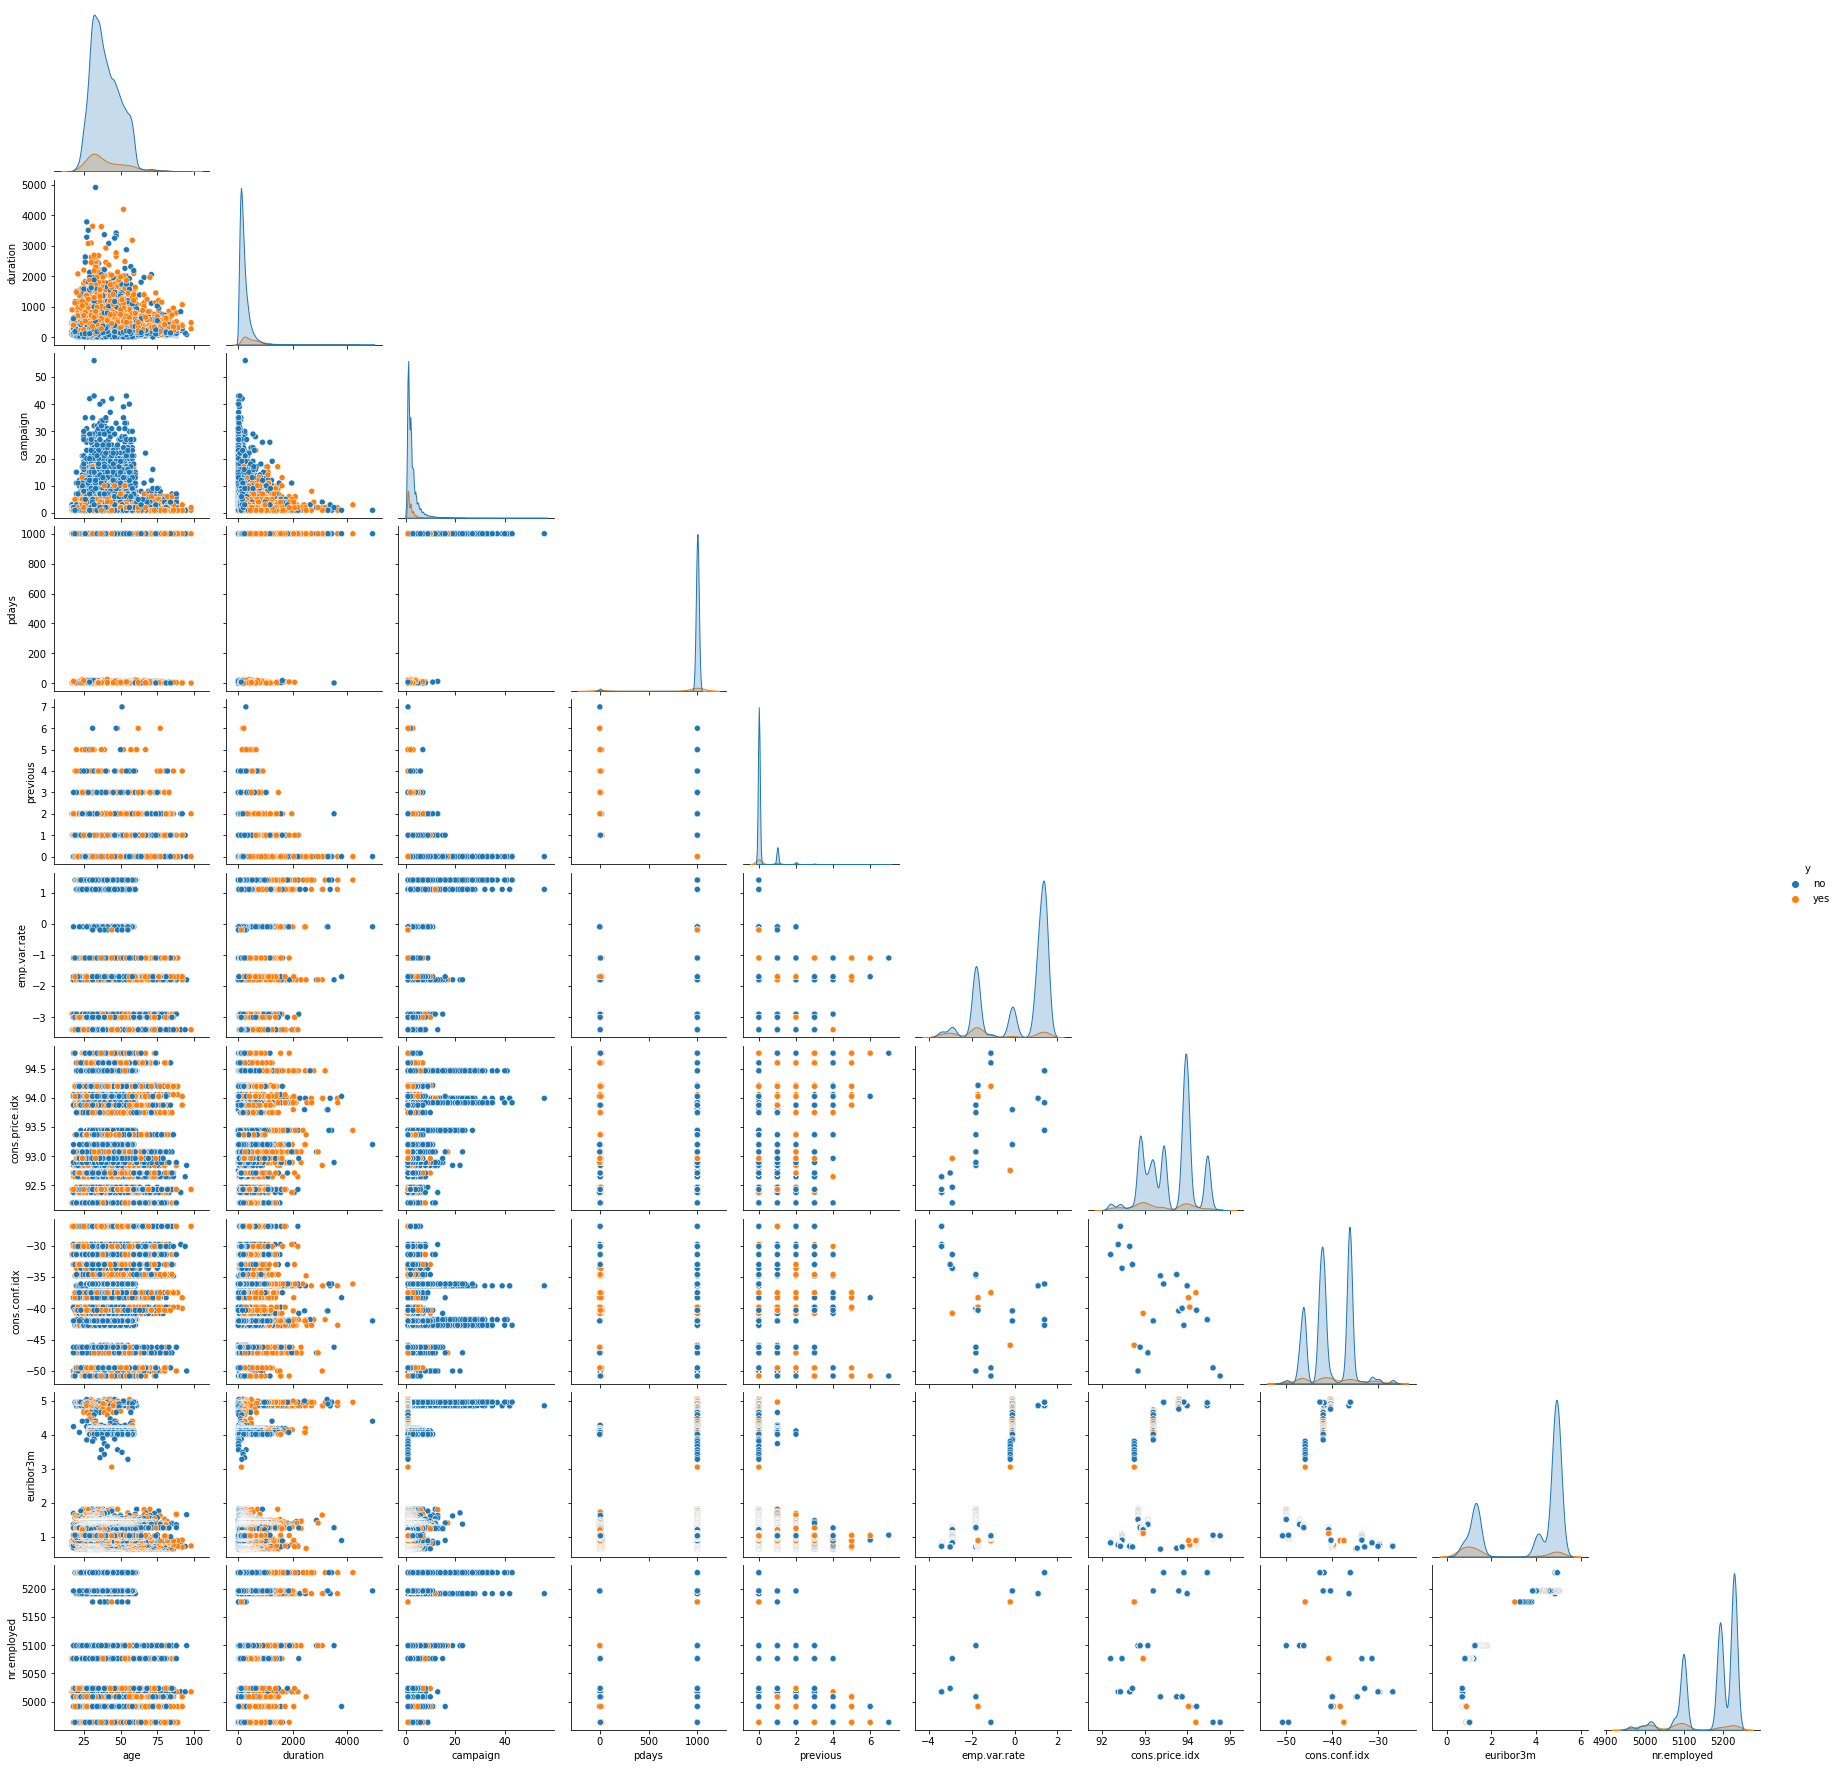

In [4]:
sns.pairplot(df, hue="y", corner=True)

There are several outliers can be seen here

# Dataset Information

### Bank Client Data:
<br>1 - age (numeric) 
<br>2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<br>3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>5 - default: has credit in default? (categorical: 'no','yes','unknown')
<br>6 - housing: has housing loan? (categorical: 'no','yes','unknown')
<br>7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### Related with the last contact of the current campaign:
<br>8 - contact: contact communication type (categorical: 'cellular','telephone')
<br>9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### Other Attributes:
<br>12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### Social and Economic Context Attributes
<br>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output Variable (desired target):
<br>21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Describe all numerical column

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


We can see in detail the anomaly in the numeric dataset

In [6]:
print("Total client previously not contacted is %s" %len(df.loc[df["pdays"] == 999]))

Total client previously not contacted is 39673


In [7]:
print("Total Employment Variation Rate at 1.4 is %s" %len(df.loc[df["emp.var.rate"] >= 1.4]))

Total Employment Variation Rate at 1.4 is 16234


In [8]:
print("Total client above age 90 is %s" %len(df.loc[df["age"] > 47]))

Total client above age 90 is 9873


In [9]:
print("Total number of contact performed more than 3 times during this campaign is %s" %len(df.loc[df["campaign"] > 3]))

Total number of contact performed more than 3 times during this campaign is 7635


now let's see total of unique value in each column 

In [10]:
categorical_col = df.select_dtypes(["object"]).columns.tolist()
numerical_col = [i for i in df if i not in categorical_col]
print("Categorical Column: ", categorical_col)
print("Numerical Column: ", numerical_col)

Categorical Column:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Column:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [11]:
print("Categorical column")
for i in categorical_col:
    print(f"{i}: {df[i].nunique()} {str(df[i].dtype)}")

Categorical column
job: 12 object
marital: 4 object
education: 8 object
default: 3 object
housing: 3 object
loan: 3 object
contact: 2 object
month: 10 object
day_of_week: 5 object
poutcome: 3 object
y: 2 object


How many number of unique values in each categorical column

In [12]:
print("Numerical column")
for i in numerical_col:
    print(f"{i}: {df[i].nunique()} {str(df[i].dtype)}")

Numerical column
age: 78 int64
duration: 1544 int64
campaign: 42 int64
pdays: 27 int64
previous: 8 int64
emp.var.rate: 10 float64
cons.price.idx: 26 float64
cons.conf.idx: 26 float64
euribor3m: 316 float64
nr.employed: 11 float64


How many number of unique values in each numerical column

In [13]:
cat_num = ["emp.var.rate", "previous", "nr.employed"]

We define new variable about categorical type in numerical column

In [14]:
n_yes = df[df["y"] == "yes"].shape[0]
n_no = df[df["y"] == "no"].shape[0]
print("Total yes on target column is %s" % n_yes)
print("Total no on target column is %s" % n_no)

Total yes on target column is 4640
Total no on target column is 36548


The balance between yes and no in target variable is 1:8

Checking their correlation with our target variable and filter it according to their correlation

In [15]:
from sklearn.preprocessing import OrdinalEncoder

label = OrdinalEncoder()
corr = df.copy()
categorical = corr.select_dtypes(["object"]).columns
corr[categorical] = label.fit_transform(corr[categorical])
corr = corr.corr()["y"]
print(corr)

age               0.030399
job               0.025122
marital           0.046203
education         0.057799
default          -0.099352
housing           0.011552
loan             -0.004909
contact          -0.144773
month            -0.006065
day_of_week       0.015967
duration          0.405274
campaign         -0.066357
pdays            -0.324914
previous          0.230181
poutcome          0.129789
emp.var.rate     -0.298334
cons.price.idx   -0.136211
cons.conf.idx     0.054878
euribor3m        -0.307771
nr.employed      -0.354678
y                 1.000000
Name: y, dtype: float64


# EDA Analysis:
 - This dataset have several severe outliers
 - Data target variable is too imbalance by 1:8
 - emp.var.rate, previous, and nr.employed can be seen as categorical column
 - we can ignore duration according to the dataset's source information
 - we need to remove outliers on age and campaigns
 - need to somehow deal with pdays

# Data Preprocessing

Split the data

In [16]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
random_state = 16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)


we need to deal with outliers

In [17]:
outliers = ["campaign", "age"]
q25, q75 = X_train[outliers].quantile(0.25), X_train[outliers].quantile(0.75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

print(upper)
print("Total outliers column duration: %s" % len(X_train[X_train[outliers[0]] > upper[0]]))
print("Total outliers column campaign: %s" % len(X_train[X_train[outliers[1]] > upper[1]]))

campaign     6.0
age         69.5
dtype: float64
Total outliers column duration: 1690
Total outliers column campaign: 322


In [18]:
def outliers_func(data):
    data[outliers[0]] = np.where(data[outliers[0]] > upper[0], upper[0], data[outliers[0]])
    data[outliers[1]] = np.where(data[outliers[1]] > upper[1], upper[1], data[outliers[1]])
    return data

In [19]:
X_train = outliers_func(X_train)
X_test = outliers_func(X_test)
print("Total outliers on campaign: %s" %len(X_train[X_train[outliers[0]] > upper[0]]))
print("Total outliers on age: %s" %len(X_train[X_train[outliers[1]] > upper[1]]))

Total outliers on campaign: 0
Total outliers on age: 0


We are going to fix pdays by replacing the 999 value to -1

In [20]:
X_train["pdays"] = np.where(X_train["pdays"] == 999, -1, X_train["pdays"])
X_test["pdays"] = np.where(X_test["pdays"] == 999, -1, X_test["pdays"])


Feature Selection

In [21]:
corr = list(corr[(corr > 0.1) + (corr < -0.1)].to_frame().index.to_list())
X_train = X_train[corr[:-1]]
X_train = X_train.drop(["duration"], axis = 1)
data = X_train.copy()
print(corr)
X_train.head(5)

['contact', 'duration', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'y']


,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
21148,cellular,-1,0,nonexistent,1.4,93.444,4.963,5228.1
20256,cellular,-1,0,nonexistent,1.4,93.444,4.965,5228.1
30530,cellular,-1,0,nonexistent,-1.8,92.893,1.354,5099.1
32446,cellular,-1,0,nonexistent,-1.8,92.893,1.313,5099.1
12397,cellular,-1,0,nonexistent,1.4,93.918,4.960,5228.1


# Data Preprocessing

Feature engineering

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# define one hot encode and standardscaker
onehot_encoder = OneHotEncoder()
scaler = StandardScaler()
ordinal = OrdinalEncoder()

# define categorical and numerical data
categorical = X_train.select_dtypes(["object"]).columns.to_list()
categorical.extend(cat_num)
numerical = [i for i in X_train if i not in categorical]

# fit transform
categorical_train = onehot_encoder.fit_transform(X_train[categorical]).toarray()
numerical_train = scaler.fit_transform(X_train[numerical])

# transform
categorical_test = onehot_encoder.transform(X_test[categorical]).toarray()
numerical_test = scaler.transform(X_test[numerical])

# concatenate to become X
X_train = np.concatenate((categorical_train, numerical_train), axis=1)
X_test = np.concatenate((categorical_test, numerical_test), axis=1)
X_train.shape

(28831, 37)

# Training and Evaluating Each Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.model_selection import cross_validate, cross_val_score, RepeatedStratifiedKFold, GridSearchCV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=random_state)

RepeatedStratifiedKFold is a cross validation method, we gonna use this for our gridsearchcv

### Logistic Regression

Penalty is set for l2 the default, while the gridsearchcv gonna find which C and solver for this dataset

In [24]:
logreg = LogisticRegression()
params_logreg = [{"penalty" : ["l2"], "C" : [10,1,0.1],
                "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                }]
gs_logreg = GridSearchCV(logreg, param_grid=params_logreg, scoring="f1_macro", cv = cv, n_jobs=-1, refit = 'f1_macro')
gs_logreg.fit(X_train, y_train)

y_pred_test_logreg = gs_logreg.predict(X_test)
y_pred_train_logreg = gs_logreg.predict(X_train)

print("Train")
print("\nClassification Report: ")
print(classification_report(y_train, y_pred_train_logreg))

print("\nTest")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_test_logreg))

print(f"Best params= {gs_logreg.best_params_}")
print(f"Best score= {gs_logreg.best_score_}")



C:\Users\Shinsaragi\anaconda3\envs\hacktiv8\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     25614
         yes       0.68      0.21      0.32      3217

    accuracy                           0.90     28831
   macro avg       0.79      0.60      0.64     28831
weighted avg       0.88      0.90      0.88     28831


Test

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10934
         yes       0.69      0.23      0.34      1423

    accuracy                           0.90     12357
   macro avg       0.80      0.61      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Best params= {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
Best score= 0.6347118347360675


### SVM Classification

set the degree to 3 (less will have less accuracy but if we set more, it will take too much time for the training), set C (the strength of the regularization) to high, normal, low, then the kernel to either poly or rbf or sigmoid

In [25]:
svc = SVC()
params_svc = [{"degree" : [2], "C" : [10,1,0.1],
                "kernel" : ["poly", "rbf", "sigmoid"],
                }]
gs_svc = GridSearchCV(svc, param_grid=params_svc, scoring="f1_macro", cv = 10, n_jobs=-1, refit = 'f1_macro')
gs_svc.fit(X_train, y_train)
y_pred_test_svc = gs_svc.predict(X_test)
y_pred_train_svc = gs_svc.predict(X_train)

print("Train")
print("\nClassification Report: ")
print(classification_report(y_train, y_pred_train_svc))

print("\nTest")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_test_svc))

print(f"Best params= {gs_svc.best_params_}")
print(f"Best score= {gs_svc.best_score_}")


Train

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     25614
         yes       0.67      0.25      0.37      3217

    accuracy                           0.90     28831
   macro avg       0.79      0.62      0.66     28831
weighted avg       0.89      0.90      0.88     28831


Test

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10934
         yes       0.66      0.26      0.37      1423

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357

Best params= {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Best score= 0.6500973994380826


### Decision Tree Classifier

For Decision Tree, to decrease the overfit, we are gonna mess with max_depth (more depth mean more complex), max_features(to limit the feature which feature it gonna use, less features means less chance to overfit but higher chance to underfit which is why we gonna balance it), max_leaf_nodes(by setting this up there are less chance for overfit)

In [26]:
dtc = DecisionTreeClassifier() 
params_dtc = [{"max_depth" : [16,32], "max_leaf_nodes" : [16,32],
                "max_features" : [i*0.1 for i in range(4,11)], "random_state":[random_state]
                }]
gs_dtc = GridSearchCV(dtc, param_grid=params_dtc, scoring='f1_macro', cv = cv, n_jobs=-1, refit = 'f1_macro')
gs_dtc.fit(X_train, y_train)
y_pred_test_dtc = gs_dtc.predict(X_test)
y_pred_train_dtc = gs_dtc.predict(X_train)

print("Decision Tree Classification")
print("Train")
print("\nClassification Report: ")
print(classification_report(y_train, y_pred_train_dtc))

print("\nTest")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_test_dtc))

print(f"Best params= {gs_dtc.best_params_}")
print(f"Best score= {gs_dtc.best_score_}")

Decision Tree Classification
Train

Classification Report: 
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     25614
         yes       0.66      0.29      0.40      3217

    accuracy                           0.90     28831
   macro avg       0.79      0.63      0.67     28831
weighted avg       0.89      0.90      0.89     28831


Test

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10934
         yes       0.63      0.29      0.40      1423

    accuracy                           0.90     12357
   macro avg       0.77      0.63      0.67     12357
weighted avg       0.88      0.90      0.88     12357

Best params= {'max_depth': 16, 'max_features': 1.0, 'max_leaf_nodes': 32, 'random_state': 16}
Best score= 0.6612223267218995


### Random Forest Classifier

Same as decision tree but with n_estimators which means how many tree we want to make, 500 is good enough to not take longer training time while still being a complex model

In [27]:
rfc = RandomForestClassifier() #max_depth=16, max_features = 0.8, max_leaf_nodes = 16, random_state=random_state
params_rfc = [{"max_depth" : [16,32], "max_leaf_nodes" : [16,32], "n_estimators" : [500],
                "max_features" : [0.6,0.8,1.0], "random_state":[random_state]
                }]
gs_rfc = GridSearchCV(rfc, param_grid=params_rfc, scoring='f1_macro', cv = 10, n_jobs=-1, refit = 'f1_macro')
gs_rfc.fit(X_train, y_train)
y_pred_test_rfc = gs_rfc.predict(X_test)
y_pred_train_rfc = gs_rfc.predict(X_train)

print("Random Forest Classification")
print("Train")
print("\nClassification Report: ")
print(classification_report(y_train, y_pred_train_rfc))

print("\nTest")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_test_rfc))

print(f"Best params= {gs_rfc.best_params_}")
print(f"Best score= {gs_rfc.best_score_}")

Random Forest Classification
Train

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     25614
         yes       0.70      0.25      0.37      3217

    accuracy                           0.90     28831
   macro avg       0.81      0.62      0.66     28831
weighted avg       0.89      0.90      0.88     28831


Test

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10934
         yes       0.65      0.25      0.36      1423

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357

Best params= {'max_depth': 16, 'max_features': 1.0, 'max_leaf_nodes': 32, 'n_estimators': 500, 'random_state': 16}
Best score= 0.6483935187138947


### KNeighbors Classifier

to make a baseline model to compare with other complicated models, we choose the n_neighbors with multiply of 8

In [28]:
knc = KNeighborsClassifier()
params_knc = [{"n_neighbors" : [i*8 for i in range(1,6)]}]
gs_knc = GridSearchCV(knc, param_grid=params_knc, scoring='f1_macro', cv = cv, n_jobs=-1, refit = 'f1_macro')
gs_knc.fit(X_train, y_train)
y_pred_test_knc = gs_knc.predict(X_test)
y_pred_train_knc = gs_knc.predict(X_train)

print("KNeighbors Classification")
print("Train")
print("\nClassification Report: ")
print(classification_report(y_train, y_pred_train_knc))

print("\nTest")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_test_knc))

print(f"Best params= {gs_knc.best_params_}")
print(f"Best score= {gs_knc.best_score_}")

KNeighbors Classification
Train

Classification Report: 
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     25614
         yes       0.69      0.27      0.39      3217

    accuracy                           0.91     28831
   macro avg       0.80      0.63      0.67     28831
weighted avg       0.89      0.91      0.89     28831


Test

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10934
         yes       0.63      0.26      0.37      1423

    accuracy                           0.90     12357
   macro avg       0.77      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357

Best params= {'n_neighbors': 16}
Best score= 0.6571001319674576


### Naive Bayes

Naive Bayes algorithm is also to make a baseline model. adding var_smoothing so it will not create an error or nan value. since there is no need to use gridsearchcv here, we gonna use the cross validation score here 

In [29]:
gnb = GaussianNB(var_smoothing=1e-09)
gnb.fit(X_train, y_train)
y_pred_test_gnb = gnb.predict(X_test)
y_pred_train_gnb = gnb.predict(X_train)

print("Naive Bayes Classification")
print("Train")
print("\nClassification Report: ")
print(classification_report(y_train, y_pred_train_gnb))

print("\nTest")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_test_gnb))

score = cross_val_score(gnb, X_train, y_train, scoring="f1_macro", cv=cv, n_jobs=-1, )
print(f"Mean F1 score: {np.mean(score)} (std: {np.std(score):.3f})")

Naive Bayes Classification
Train

Classification Report: 
              precision    recall  f1-score   support

          no       0.94      0.92      0.93     25614
         yes       0.43      0.50      0.46      3217

    accuracy                           0.87     28831
   macro avg       0.68      0.71      0.69     28831
weighted avg       0.88      0.87      0.87     28831


Test

Classification Report: 
              precision    recall  f1-score   support

          no       0.93      0.91      0.92     10934
         yes       0.43      0.50      0.46      1423

    accuracy                           0.87     12357
   macro avg       0.68      0.71      0.69     12357
weighted avg       0.88      0.87      0.87     12357

Mean F1 score: 0.6803866560041253 (std: 0.034)


### AdaBoost Classifier

A boosting algorithm, 

In [34]:
ada = AdaBoostClassifier()
params_ada = [{"base_estimator": [DecisionTreeClassifier(max_depth= 16, max_features= 0.8, max_leaf_nodes= 32,)],
                "n_estimators" : [500], "learning_rate" : [0.5, 0.1], "random_state":[random_state]}]
gs_ada = GridSearchCV(ada, param_grid=params_ada, scoring='f1_macro', cv = 5, n_jobs=-1, refit = 'f1_macro')
gs_ada.fit(X_train, y_train)
y_pred_test_ada = gs_ada.predict(X_test)
y_pred_train_ada = gs_ada.predict(X_train)

print("AdaBoost Classification")
print("Train")
print("\nClassification Report: ")
print(classification_report(y_train, y_pred_train_ada))

print("\nTest")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_test_ada))

print(f"Best params= {gs_ada.best_params_}")
print(f"Best score= {gs_ada.best_score_}")

AdaBoost Classification
Train

Classification Report: 
              precision    recall  f1-score   support

          no       0.92      0.99      0.96     25614
         yes       0.82      0.36      0.50      3217

    accuracy                           0.92     28831
   macro avg       0.87      0.67      0.73     28831
weighted avg       0.91      0.92      0.91     28831


Test

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.97      0.94     10934
         yes       0.56      0.26      0.35      1423

    accuracy                           0.89     12357
   macro avg       0.74      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357

Best params= {'base_estimator': DecisionTreeClassifier(max_depth=16, max_features=0.8, max_leaf_nodes=32), 'learning_rate': 0.5, 'n_estimators': 500, 'random_state': 16}
Best score= 0.649600641977248


ROC AUC plot

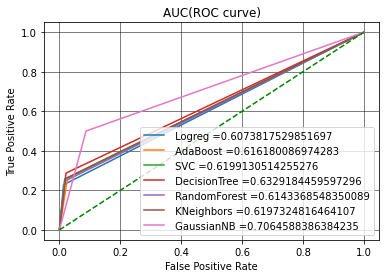

In [35]:
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_test2 = label.fit_transform(y_test)
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test2, label.transform(y_pred_test_logreg))
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test2, label.transform(y_pred_test_ada))
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test2, label.transform(y_pred_test_svc))
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test2, label.transform(y_pred_test_dtc))
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test2, label.transform(y_pred_test_rfc))
knc_fpr, knc_tpr, knc_thresholds = roc_curve(y_test2, label.transform(y_pred_test_knc))
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test2, label.transform(y_pred_test_gnb))

plt.grid()
plt.plot(logreg_fpr, logreg_tpr, label=" Logreg ="+str(auc(logreg_fpr, logreg_tpr)))
plt.plot(ada_fpr, ada_tpr, label=" AdaBoost ="+str(auc(ada_fpr, ada_tpr)))
plt.plot(svc_fpr, svc_tpr, label=" SVC ="+str(auc(svc_fpr, svc_tpr)))
plt.plot(dtc_fpr, dtc_tpr, label=" DecisionTree ="+str(auc(dtc_fpr, dtc_tpr)))
plt.plot(rfc_fpr, rfc_tpr, label=" RandomForest ="+str(auc(rfc_fpr, rfc_tpr)))
plt.plot(knc_fpr, knc_tpr, label=" KNeighbors ="+str(auc(knc_fpr, knc_tpr)))
plt.plot(gnb_fpr, gnb_tpr, label=" GaussianNB ="+str(auc(gnb_fpr, gnb_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


# Model Inference

In [44]:
data[66:69]
categorical_data = data.select_dtypes(["object"]).columns.to_list()
categorical_data.extend(cat_num)
numerical_data = [i for i in data if i not in categorical_data]
print(list(data.columns))
for i in categorical_data:
    print(f"{i}: {data[i].unique()}")
for i in numerical_data:
    print(f"Max: {data[i].max()}, Min: {data[i].min()}")

['contact', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
contact: ['cellular' 'telephone']
poutcome: ['nonexistent' 'failure' 'success']
emp.var.rate: [ 1.4 -1.8 -2.9  1.1 -1.7 -0.1 -1.1 -3.  -3.4 -0.2]
previous: [0 2 1 3 4 6 5 7]
nr.employed: [5228.1 5099.1 5076.2 5191.  4991.6 5195.8 5008.7 4963.6 5023.5 5017.5
 5176.3]
Max: 27, Min: -1
Max: 94.767, Min: 92.201
Max: 5.045, Min: 0.634


In [49]:
new_data = pd.DataFrame([["cellular", 1, 3, "failure", -1.8, 93, 3.33, 5099.1]], columns= data.columns)
# transform
c = scaler.transform(new_data[numerical_data])
n = onehot_encoder.transform(new_data[categorical_data]).toarray()
new_data = np.concatenate((c, n), axis =1)

print("Has the client subscribed a term deposit? %s" % gnb.predict(new_data)[0])
print("Has the client subscribed a term deposit? %s" % gs_dtc.predict(new_data)[0])

Has the client subscribed a term deposit? yes
Has the client subscribed a term deposit? no


# Conclusion

Model Analysis:
 - This model is not underfitting nor overfitting but the f1 macro score is bad
 - NaiveBayes is a better algorithm than KNeighbors Classification here, and even though it's should be a baseline model it got the best score compared to other model
 - it seems the model is biased to "no" label

Overall Analysis:
 - This dataset size is just right enough to make a supervised model
 - This dataset is a severe imbalance by 1:8, the model cant get a proper training
 - Need to balanced the dataset first and increase it's f1 macro score before we can deploy it
 - The dataset have some weird outliers or value on some column but actually might not be outliers